In [ ]:
!pip install geopandas
!pip install salem
import numpy as np
import pandas as pd
import zipfile
import xarray as xr
import geopandas as gpd
import salem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display
from matplotlib import rc
rc('animation', html='jshtml')
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2})

##data load

In [ ]:
import xarray as xr
#define archivos NC
wglc = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/OUTPUT DATA/wglc_clim_modified.nc")

CC = xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/OUTPUT DATA/CC_monthly.nc")

PISCO_M=xr.open_dataset("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/OUTPUT DATA/pisco_clim_monthly.nc")


In [ ]:
#def coordinates
PISCO_M=PISCO_M.rename({"month":"month","longitude": "longitud", "latitude": "latitud"})
PISCO_M

## define shapes from natural regions from Peru and south america

In [ ]:
#sudamerica
shp = salem.read_shapefile("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/sudamerica/Sudamérica.shp").\
to_crs({"init": "epsg:4326"})

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
#regiones naturales
shdf = salem.read_shapefile("/content/drive/MyDrive/TRABAJO TÉCNICAS 2/DATOS T[ECNICAS 2/shps/areas naturales del peru/region natural_geogpsperu_JuanPabloSuyoPomalia.shp").\
to_crs({"init": "epsg:4326"})

##Crop to delete ocean values

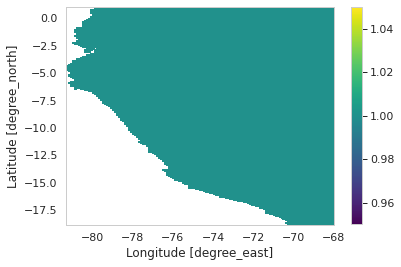

In [ ]:
#creación dataarray del crop 
to_mask = PISCO_M.Prec.isel(month=0).copy()
to_mask = to_mask.to_numpy()
to_mask[to_mask > 0] = 1
to_mask[to_mask == 0] = np.nan
to_mask = xr.DataArray(to_mask, coords={"longitud":PISCO_M.longitud, "latitud":PISCO_M.latitud}, dims=["latitud","longitud"])
to_mask.plot()

In [ ]:
#multiplicar 
l=PISCO_M.Prec*to_mask
#xarray dataarray a dataset
PMA=l.to_dataset(name="Prec")
#exportar a archivo nc
PMA.to_netcdf("PP_wo.nc")

##GIF

In [ ]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6), constrained_layout=False, sharex=True, sharey=True)

#grafica 1 WGLC
ax.set_axisbelow(False)
#variable de wglc
cax1 = wglc.density[0,:,:].plot(cmap='icefire', vmin=0, 
                                vmax=0.03,add_colorbar=False, 
                                extend='max', ax=ax)

axin = inset_axes(ax, width='5%', height='40%', 
                  loc = 'lower left', bbox_to_anchor = (0.06, 0.025, 1 ,1), 
                  bbox_transform = ax.transAxes)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Incidencia de rayos")
#shape sudamerica
shp.geometry.boundary.plot(ax = ax, 
                           edgecolor = "black", 
                           linewidth = .25)
#shape regiones naturales
shdf.geometry.boundary.plot(ax = ax, 
                            edgecolor = "black", 
                            linewidth = .75)
#colorbar 1
cb = plt.colorbar(cax1, cax=axin, orientation = "vertical", aspect = 4, ticks = [0.000,0.005,0.010,0.015,0.020,0.025,0.030])
cb.ax.set_yticklabels([0.000,0.005,0.010,0.015,0.020,0.025,0.030], fontdict={"fontsize":7})
cb.ax.set_ylabel('Incidencia de rayos clim.', labelpad=-52, fontsize=9)
cb.ax.set_title('/(mes)', fontsize = 6)
#grid 1
ax.grid(True, linestyle='--', color = "black", alpha = 0.1)


#GRAFICA 2 CC
ax2.set_axisbelow(False)
#var. Cobertura nubosa
cax2 = CC.variable[0,:,:].plot(cmap='RdBu', vmin=0, vmax=100,add_colorbar=False, extend='max',ax=ax2)

#definir la locación del colorbar para ax2
axin = inset_axes(ax, width='5%', height='40%', 
                  loc = 'lower left', bbox_to_anchor = (0.06, 0.025, 1 ,1), 
                  bbox_transform = ax2.transAxes)

ax2.set_xlabel("Longitud")
ax2.set_ylabel("Latitud")
ax2.set_title("Cobertura nubosa")
#shape sudamerica
shp.geometry.boundary.plot(ax = ax2, 
                           edgecolor = "black", 
                           linewidth = .25)
#shape regiones naturales
shdf.geometry.boundary.plot(ax = ax2, 
                            edgecolor = "black", 
                            linewidth = .75)
#colorbar 2
cb = plt.colorbar(cax2, cax=axin, orientation = "vertical", aspect = 4, ticks = [10,20,30,50,40,60,80,100])
cb.ax.set_yticklabels([10,20,30,50,40,60,80,100], fontdict={"fontsize":7})
cb.ax.set_ylabel('Cobertura nubosa clim.', labelpad=-52, fontsize=9)
cb.ax.set_title('(%)/(mes)', fontsize = 6)
#grid 2
ax2.grid(True, linestyle='--', color = "black", alpha = 0.1)


#GRAFICA 3 PRECIPITACION
ax3.set_axisbelow(False)
cax3 = PMA.Prec[0,:,:].plot(cmap='crest', vmin=100, 
                            vmax=400,add_colorbar=False,
                            ax=ax3)
#definir la locación del colorbar para ax3
axin = inset_axes(ax, width='5%', height='40%', 
                  loc = 'lower left', bbox_to_anchor = (0.06, 0.025, 1 ,1), 
                  bbox_transform = ax3.transAxes)

ax3.set_xlabel("Longitud")
ax3.set_ylabel("Latitud")
ax3.set_title("Precipitacion")
#shape sudamerica
shp.geometry.boundary.plot(ax = ax3, 
                           edgecolor = "black", 
                           linewidth = .25)
#shape regiones naturales
shdf.geometry.boundary.plot(ax = ax3, 
                            edgecolor = "black", 
                            linewidth = .75)
#colorbar 3
cb = plt.colorbar(cax3, cax=axin, orientation = "vertical", aspect = 4, ticks = [100,150,200,250,300,350,400,450])
cb.ax.set_yticklabels([100,150,200,250,300,350,400,450], fontdict={"fontsize":7})
cb.ax.set_ylabel('Precipiación', labelpad=-52, fontsize=9)
cb.ax.set_title('(mm)/(mes)', fontsize = 6)
#grid 3
ax3.grid(True, linestyle='--', color = "black", alpha = 0.1)
plt.close(fig)


#definir función para la animación de los 12 meses 
def animate(frame):

    cax1.set_array(wglc.density[frame,:,:].values.flatten())
    ax.set_title("Número de mes = " + str(wglc.density.coords['time'].values[frame])[:13])

    cax2.set_array(CC.variable[frame,:,:].values.flatten())
    ax2.set_title("Número de mes = " + str(CC.variable.coords['time'].values[frame])[:13])

    cax3.set_array(PMA.Prec[frame,:,:].values.flatten())
    ax3.set_title("Número de mes = " + str(PMA.Prec.coords['month'].values[frame])[:13])



ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12,       # Could also be iterable or list
    interval=1500     # ms between frames
)

HTML(ani.to_jshtml())


In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [ ]:
#para guardar gif en un archivo gif
ani.save('pp_wglc_cc.gif', writer='imagemagick', fps=1)